<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU.animation.8.3.SVM.titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    fp = fm.FontProperties(fname=font_path)
    try:
        print(f"{fp.get_name()} - {font_path}")
    except RuntimeError:
        pass


NanumGothicCoding - /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
Nanum Pen Script - /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquareRound - /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumSquare_ac - /usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf
Humor Sans - /usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
NanumGothic - /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare - /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic - /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumMyeongjo Eco - /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
Liberation Sans Narrow - /usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
NanumGothic Eco - /usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf
Liberation Sans Narrow - /usr/share/fonts/truet

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.font_manager as fm

##fm._rebuild()
plt.rcParams['font.family'] = 'NanumGothic ' # 또는 다른 나눔 폰트


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML
import matplotlib.animation as animation
from sklearn.decomposition import PCA

# 타이타닉 데이터셋 불러오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 데이터 전처리
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 범주형 데이터 인코딩
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop('Embarked', axis=1)

# 타겟 변수와 특성 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 교육용 시각화를 위해 가장 중요한 특성 2개만 선택 (Age와 Fare)
X_selected = X[['Age', 'Fare']]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<ipython-input-16-ee60e8994ba2>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
<ipython-input-16-ee60e8994ba2>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html_animation)
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html_animation)
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d9c3e5c6f20> (for post_execute):


KeyboardInterrupt: 

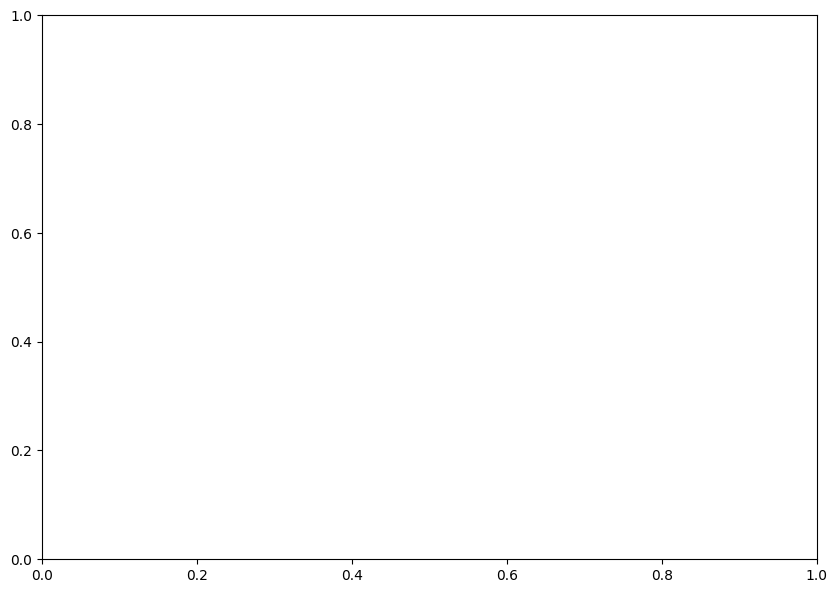

In [ ]:

# SVM 모델 생성 함수
def create_svm_model(C_value, kernel_type='linear'):
    model = SVC(C=C_value, kernel=kernel_type, gamma='auto')
    model.fit(X_train, y_train)
    return model

# 결정 경계 시각화 함수
def plot_decision_boundary(ax, model, X, y, h=0.02):
    # 메쉬 그리드 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 메쉬 그리드 포인트에서의 예측 계산
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 플롯
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.contour(xx, yy, Z, colors='k', linestyles=['-'], linewidths=2)

    # 데이터 포인트 플롯
    for label_idx, marker, color in zip([0, 1], ['x', 'o'], ['blue', 'red']):
        ax.scatter(
            X[y == label_idx, 0], X[y == label_idx, 1],
            c=color, marker=marker, s=50, edgecolors='k', alpha=0.7,
            label=f'{"사망" if label_idx == 0 else "생존"}'
        )

    # 서포트 벡터 표시
    if hasattr(model, 'support_vectors_'):
        ax.scatter(
            model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='green',
            label='서포트 벡터'
        )

    # 그래프 설정
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('나이 (스케일링됨)')
    ax.set_ylabel('요금 (스케일링됨)')
    ax.set_title(f'SVM (C={model.C})')
    ax.legend(loc='upper right')

# C 값에 따른 SVM 모델 변화 애니메이션
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 애니메이션을 위한 C 값 범위
C_values = np.logspace(-2, 2, 20)

# 초기 텍스트 객체
text = ax.text(0.02, 0.02, '', transform=ax.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 애니메이션 함수
def update(frame):
    ax.clear()
    C = C_values[frame]

    # 현재 C 값으로 SVM 모델 생성
    model = create_svm_model(C)

    # 결정 경계 시각화
    plot_decision_boundary(ax, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'
    info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text = ax.text(0.02, 0.02, info_text, transform=ax.transAxes, fontsize=12,
                  bbox=dict(facecolor='white', alpha=0.8))

    # 마진 설명 추가
    title_text = f'SVM 결정 경계 (C={C:.2f})'
    if C < 0.1:
        title_text += " - 큰 마진, 약한 규제 (underfitting 위험)"
    elif C > 10:
        title_text += " - 작은 마진, 강한 규제 (overfitting 위험)"
    else:
        title_text += " - 균형 잡힌 마진"

    ax.set_title(title_text)

    return ax, text

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(C_values), interval=500, blit=False)

# HTML로 변환하여 Colab에서 재생 가능하게 함
html_animation = animation.HTMLWriter(fps=2)
ani.save('svm_animation.html', writer=html_animation)
HTML(ani.to_jshtml())

# 커널 변화에 따른 SVM 애니메이션
fig2, ax2 = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 다양한 커널 사용
kernels = ['linear', 'poly', 'rbf']
titles = ['선형 커널', '다항식 커널', 'RBF 커널']

# 초기 텍스트 객체
text2 = ax2.text(0.02, 0.02, '', transform=ax2.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 커널 애니메이션 함수
def update_kernel(frame):
    ax2.clear()
    kernel_idx = frame % len(kernels)
    kernel = kernels[kernel_idx]
    title = titles[kernel_idx]

    # C 값은 균형 잡힌 값 사용
    model = SVC(C=1.0, kernel=kernel, gamma='auto')
    model.fit(X_train, y_train)

    # 결정 경계 시각화
    plot_decision_boundary(ax2, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'커널: {title}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text2 = ax2.text(0.02, 0.02, info_text, transform=ax2.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    # 커널 특성 설명
    kernel_explanation = ""
    if kernel == 'linear':
        kernel_explanation = "선형 커널: 직선 결정 경계로 간단한 분류 문제에 적합"
    elif kernel == 'poly':
        kernel_explanation = "다항식 커널: 비선형 결정 경계로 복잡한 패턴 포착 가능"
    elif kernel == 'rbf':
        kernel_explanation = "RBF 커널: 매우 유연한 결정 경계로 복잡한 데이터에 적합"

    ax2.set_title(f'SVM {title} (C=1.0)\n{kernel_explanation}')

    return ax2, text2

# 커널 애니메이션 생성
ani2 = FuncAnimation(fig2, update_kernel, frames=9, interval=1000, blit=False)

# HTML로 변환
html_animation2 = animation.HTMLWriter(fps=1)
ani2.save('svm_kernel_animation.html', writer=html_animation2)
HTML(ani2.to_jshtml())

# 추가: 전체 특성에 대한 PCA 시각화와 SVM
# 더 많은 특성을 포함시켜 PCA로 축소하여 시각화
numerical_cols = ['Age', 'Fare', 'Sex', 'Pclass', 'SibSp', 'Parch']
X_more = X[numerical_cols]
X_more_scaled = scaler.fit_transform(X_more)

# PCA 적용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_more_scaled)

# PCA 변환된 데이터로 학습/테스트 분할
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# PCA 데이터에 대한 SVM 애니메이션
fig3, ax3 = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 초기 텍스트 객체
text3 = ax3.text(0.02, 0.02, '', transform=ax3.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# PCA 애니메이션 함수
def update_pca(frame):
    ax3.clear()
    C = C_values[frame]

    # 현재 C 값으로 SVM 모델 생성
    model = SVC(C=C, kernel='rbf', gamma='auto')
    model.fit(X_pca_train, y_train_pca)

    # 결정 경계 시각화
    plot_decision_boundary(ax3, model, X_pca_train, y_train_pca)

    # 모델 성능 계산
    y_train_pred = model.predict(X_pca_train)
    y_test_pred = model.predict(X_pca_test)
    train_acc = accuracy_score(y_train_pca, y_train_pred)
    test_acc = accuracy_score(y_test_pca, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f} (PCA 적용 데이터)\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text3 = ax3.text(0.02, 0.02, info_text, transform=ax3.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    ax3.set_xlabel('첫 번째 주성분')
    ax3.set_ylabel('두 번째 주성분')
    ax3.set_title(f'PCA 축소 데이터에 대한 SVM (C={C:.2f})')

    return ax3, text3

# PCA 애니메이션 생성
ani3 = FuncAnimation(fig3, update_pca, frames=len(C_values), interval=500, blit=False)

# HTML로 변환
html_animation3 = animation.HTMLWriter(fps=2)
ani3.save('svm_pca_animation.html', writer=html_animation3)
HTML(ani3.to_jshtml())

# 추가 - SVM 하이퍼파라미터 튜닝 과정을 보여주는 애니메이션
fig4, ax4 = plt.subplots(figsize=(12, 10))
plt.subplots_adjust(bottom=0.15)

# C와 gamma를 함께 조정
C_values_tune = np.logspace(-2, 2, 5)
gamma_values = np.logspace(-3, 1, 5)

# 모든 조합 생성
param_combinations = [(c, g) for c in C_values_tune for g in gamma_values]

# 초기 텍스트 객체
text4 = ax4.text(0.02, 0.02, '', transform=ax4.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 하이퍼파라미터 튜닝 애니메이션 함수
def update_hyperparams(frame):
    ax4.clear()
    C, gamma = param_combinations[frame % len(param_combinations)]

    # 현재 파라미터로 SVM 모델 생성
    model = SVC(C=C, kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)

    # 결정 경계 시각화
    plot_decision_boundary(ax4, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f}, gamma: {gamma:.4f}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text4 = ax4.text(0.02, 0.02, info_text, transform=ax4.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    # 하이퍼파라미터 설명
    param_explanation = ""
    if C < 0.1:
        param_explanation += "낮은 C: 큰 마진, 일반화에 유리 / "
    elif C > 10:
        param_explanation += "높은 C: 작은 마진, 훈련 데이터에 더 집중 / "

    if gamma < 0.01:
        param_explanation += "낮은 gamma: 영향 범위 넓음, 부드러운 경계"
    elif gamma > 1:
        param_explanation += "높은 gamma: 영향 범위 좁음, 복잡한 경계"

    ax4.set_title(f'SVM 하이퍼파라미터 튜닝 (C={C:.2f}, gamma={gamma:.4f})\n{param_explanation}')

    return ax4, text4

# 하이퍼파라미터 튜닝 애니메이션 생성
ani4 = FuncAnimation(fig4, update_hyperparams, frames=len(param_combinations), interval=500, blit=False)

# HTML로 변환
html_animation4 = animation.HTMLWriter(fps=2)
ani4.save('svm_hyperparams_animation.html', writer=html_animation4)
HTML(ani4.to_jshtml())

print("애니메이션 생성 완료! 위의 애니메이션을 확인하세요.")